<img style="float:right;" src="https://data.iflood.vse.gmu.edu/Forecast/ChesapeakeBay_XBEACH/pics_for_deal/labLogoFLOOD_black.png" width=300px>      
# XBeach Post Process    
  

##### Abstract:
Coastal communities along the US mid-Atlantic region have been repeatedly affected by storm surge causing structural damage and flooding. Among different alternatives to prevent damages and flooding due to storm surge, natural and nature-based solutions, such as coastal marshes, are gaining importance as a form of coastal protection. Analysis of the data collected will be applied to coastal numerical models to replicate the nearshore physical processes in coastal marshes. We expect to develop engineering guidelines on the use of this nature based defenses for coastal protection against extreme events.  
<div align="middle">
<img style="float:center;" src="https://data.iflood.vse.gmu.edu/Forecast/ChesapeakeBay_XBEACH/pics_for_deal/Illustration%20of%20Nature%20Conservancy%20project%20site_02.jpg" width=1000px></div>

#### Initialize XBeach Libraries

In [1]:
from scipy.io import loadmat
from IPython.display import IFrame
import matplotlib as mpl
import utm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os

#### Initialize Paths

In [2]:
root = pl.Path('/Users/tmiesse/work/FHRL/eeslr/modelling/xbeach/assateague/outputs')
xb = nc4.Dataset(root/'xboutput.nc')


In [ ]:
def utm2geo(x,y,code:int=18,zone:str='northern'):
    limits = x.shape
    x2,y2 = np.ma.array(np.zeros(x.shape)),np.ma.array(np.zeros(y.shape))
    for i in range(0,limits[0]):
        for ii in range(0,limits[1]):
            coord = utm.to_latlon(x[i,ii],y[i,ii],code,zone)
            x2[i,ii] = coord[1] 
            y2[i,ii] = coord[0]
    return x2,y2

#### Initialize Variables

In [12]:
x,y = utm2geo(xb.variables['globalx'][:,:],xb.variables['globaly'][:,:])
z = xb.variables['zb'][:,:,:]
t = xb.variables['meantime'][:]
zs = xb.variables['zs'][:,:,:]
h = xb.variables['H_mean'][:,:,:]
u = xb.variables['u'][:]
v = xb.variables['v'][:]

#### Show grid and bathy of Study Site

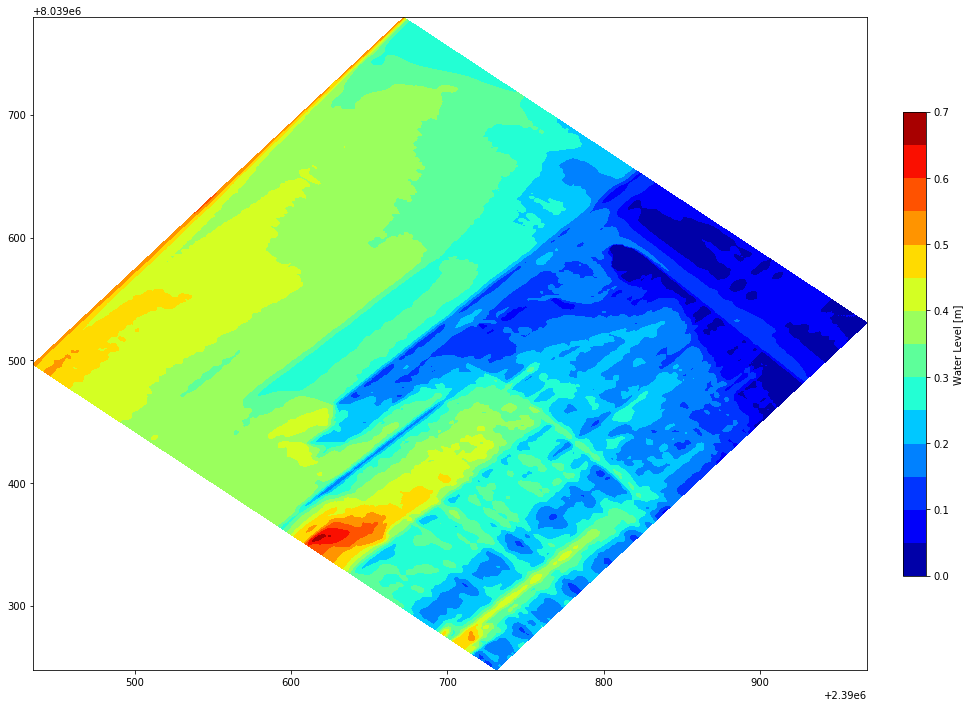

In [20]:
fig,ax = plt.subplots(figsize=(16,12))
#ax.plot(x,y,'k')
#ax.plot(x.transpose(),y.transpose(),'b')
levels = np.arange(0,0.75,.05)
plt.contourf(x,y,h[2,:,:].data,cmap='jet',vmin=np.min(levels),vmax=np.max(levels),levels=levels)
cb = plt.colorbar(cmap='jet',fraction=0.026,pad=0.04) 
cb.set_label('Water Level [m]',fontsize=10)
#ax.contourf(x,y,z[0,:,:],cmap='ocean',vmin=-0.25,vmax=0.5,alpha=0.1)
ax.set_xlim([x.min(),x.max()])
ax.set_ylim([y.min(),y.max()])
plt.show()